In [1]:
import pandas as pd
import numpy as np

In [2]:
mordredpc = pd.read_csv("NCV_models_MordredPC.csv")

In [3]:
mfpmaccs = pd.read_csv("NCV_models_MfpMACCS.csv")

In [4]:
mordredpcmfpmaccs = pd.read_csv("NCV_models_MfpMACCSMordredPhyscochemical.csv")

In [5]:
liv = pd.read_csv("NCV_models_Livdataonly.csv")

In [6]:
allfeatures = pd.read_csv("NCV_models_all_features.csv")

In [7]:
df = pd.concat([allfeatures, mordredpc, mfpmaccs, mordredpcmfpmaccs, liv]).reset_index(drop=True)
#df["BA"] = (df["Sensitivity"] +df["Sensitivity"] )/2
df

NCV  DILI   i  split        ba       mcc  Sensitivity  Specificity  \
0    NCV  DILI  42      0  0.652868  0.294831     0.693333     0.612403   
1    NCV  DILI  42      1  0.694853  0.372630     0.676471     0.713235   
2    NCV  DILI  42      2  0.685238  0.363321     0.815789     0.554688   
3    NCV  DILI  42      3  0.605006  0.206674     0.551282     0.658730   
4    NCV  DILI  42      4  0.619185  0.229295     0.552239     0.686131   
..   ...   ...  ..    ...       ...       ...          ...          ...   
270  NCV  DILI  52      0  0.618248  0.222574     0.606061     0.630435   
271  NCV  DILI  52      1  0.701351  0.389504     0.702703     0.700000   
272  NCV  DILI  52      2  0.638911  0.291111     0.487500     0.790323   
273  NCV  DILI  52      3  0.636027  0.270341     0.535211     0.736842   
274  NCV  DILI  52      4  0.660358  0.350583     0.465753     0.854962   

          auc        f1    pos_LR       ppv  average_precision_score  \
0    0.694109  0.683983  1.788800  0.774510                 0.796512   
1    0.730753  0.760784  2.358974  0.815126                 0.844597   
2    0.772101  0.666667  1.831948  0.835294                 0.841958   
3    0.631563  0.680328  1.615385  0.703390                 0.706693   
4    0.707593  0.720307  1.759459  0.758065                 0.827686   
..        ...       ...       ...       ...                      ...   
270  0.657115  0.693227  1.639929  0.769912                 0.786370   
271  0.719335  0.748971  2.342342  0.805310                 0.794623   
272  0.697278  0.745247  2.325000  0.705036                 0.767631   
273  0.702213  0.742424  2.033803  0.748092                 0.819260   
274  0.728433  0.794326  3.211247  0.741722                 0.809723   

                                       Features  
0    Morgan, Mordred, Phisicochemical, Liv data  
1    Morgan, Mordred, Phisicochemical, Liv data  
2    Morgan, Mordred, Phisicochemical, Liv data  
3    Morgan, Mordred, Phisicochemical, Liv data  
4    Morgan, Mordred, Phisicochemical, Liv data  
..                                          ...  
270                               Liv data only  
271                               Liv data only  
272                               Liv data only  
273                               Liv data only  
274                               Liv data only  

[275 rows x 14 columns]

In [8]:
df.to_csv("NCV_models_compiled.csv", index=False)

In [9]:
df.groupby("Features").mean()

i  split        ba       mcc  \
Features                                                                      
Liv data only                               47.0    2.0  0.642759  0.283788   
MfpMACCS                                    47.0    2.0  0.633458  0.262111   
MordredPC                                   47.0    2.0  0.646323  0.284957   
Morgan, MACCS, Mordred, Phisicochemical     47.0    2.0  0.649881  0.290597   
Morgan, Mordred, Phisicochemical, Liv data  47.0    2.0  0.657567  0.307003   

                                            Sensitivity  Specificity  \
Features                                                               
Liv data only                                  0.593006     0.692512   
MfpMACCS                                       0.603484     0.663431   
MordredPC                                      0.634065     0.658581   
Morgan, MACCS, Mordred, Phisicochemical        0.643369     0.656394   
Morgan, Mordred, Phisicochemical, Liv data     0.641044     0.674090   

                                                 auc        f1    pos_LR  \
Features                                                                   
Liv data only                               0.692924  0.717831  2.091786   
MfpMACCS                                    0.690053  0.700676  1.866332   
MordredPC                                   0.700746  0.704983  1.927397   
Morgan, MACCS, Mordred, Phisicochemical     0.702203  0.705982  1.927328   
Morgan, Mordred, Phisicochemical, Liv data  0.711373  0.717565  2.019751   

                                                 ppv  average_precision_score  
Features                                                                       
Liv data only                               0.755675                 0.786030  
MfpMACCS                                    0.753817                 0.782279  
MordredPC                                   0.766239                 0.793482  
Morgan, MACCS, Mordred, Phisicochemical     0.769599                 0.796189  
Morgan, Mordred, Phisicochemical, Liv data  0.775305                 0.802861

In [10]:
df.groupby("Features").mean().to_csv("NCV_models_compiled_mean.csv")

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [13]:
from statannotations.Annotator import Annotator

In [14]:
df.Features.unique()

array(['Morgan, Mordred, Phisicochemical, Liv data', 'MordredPC',
       'MfpMACCS', 'Morgan, MACCS, Mordred, Phisicochemical',
       'Liv data only'], dtype=object)

ba
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:2.273e-03 t=-3.204e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:6.582e-02 t=-1.878e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:8.569e-04 t=-3.531e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:8.950e-05 t=-4.235e+00


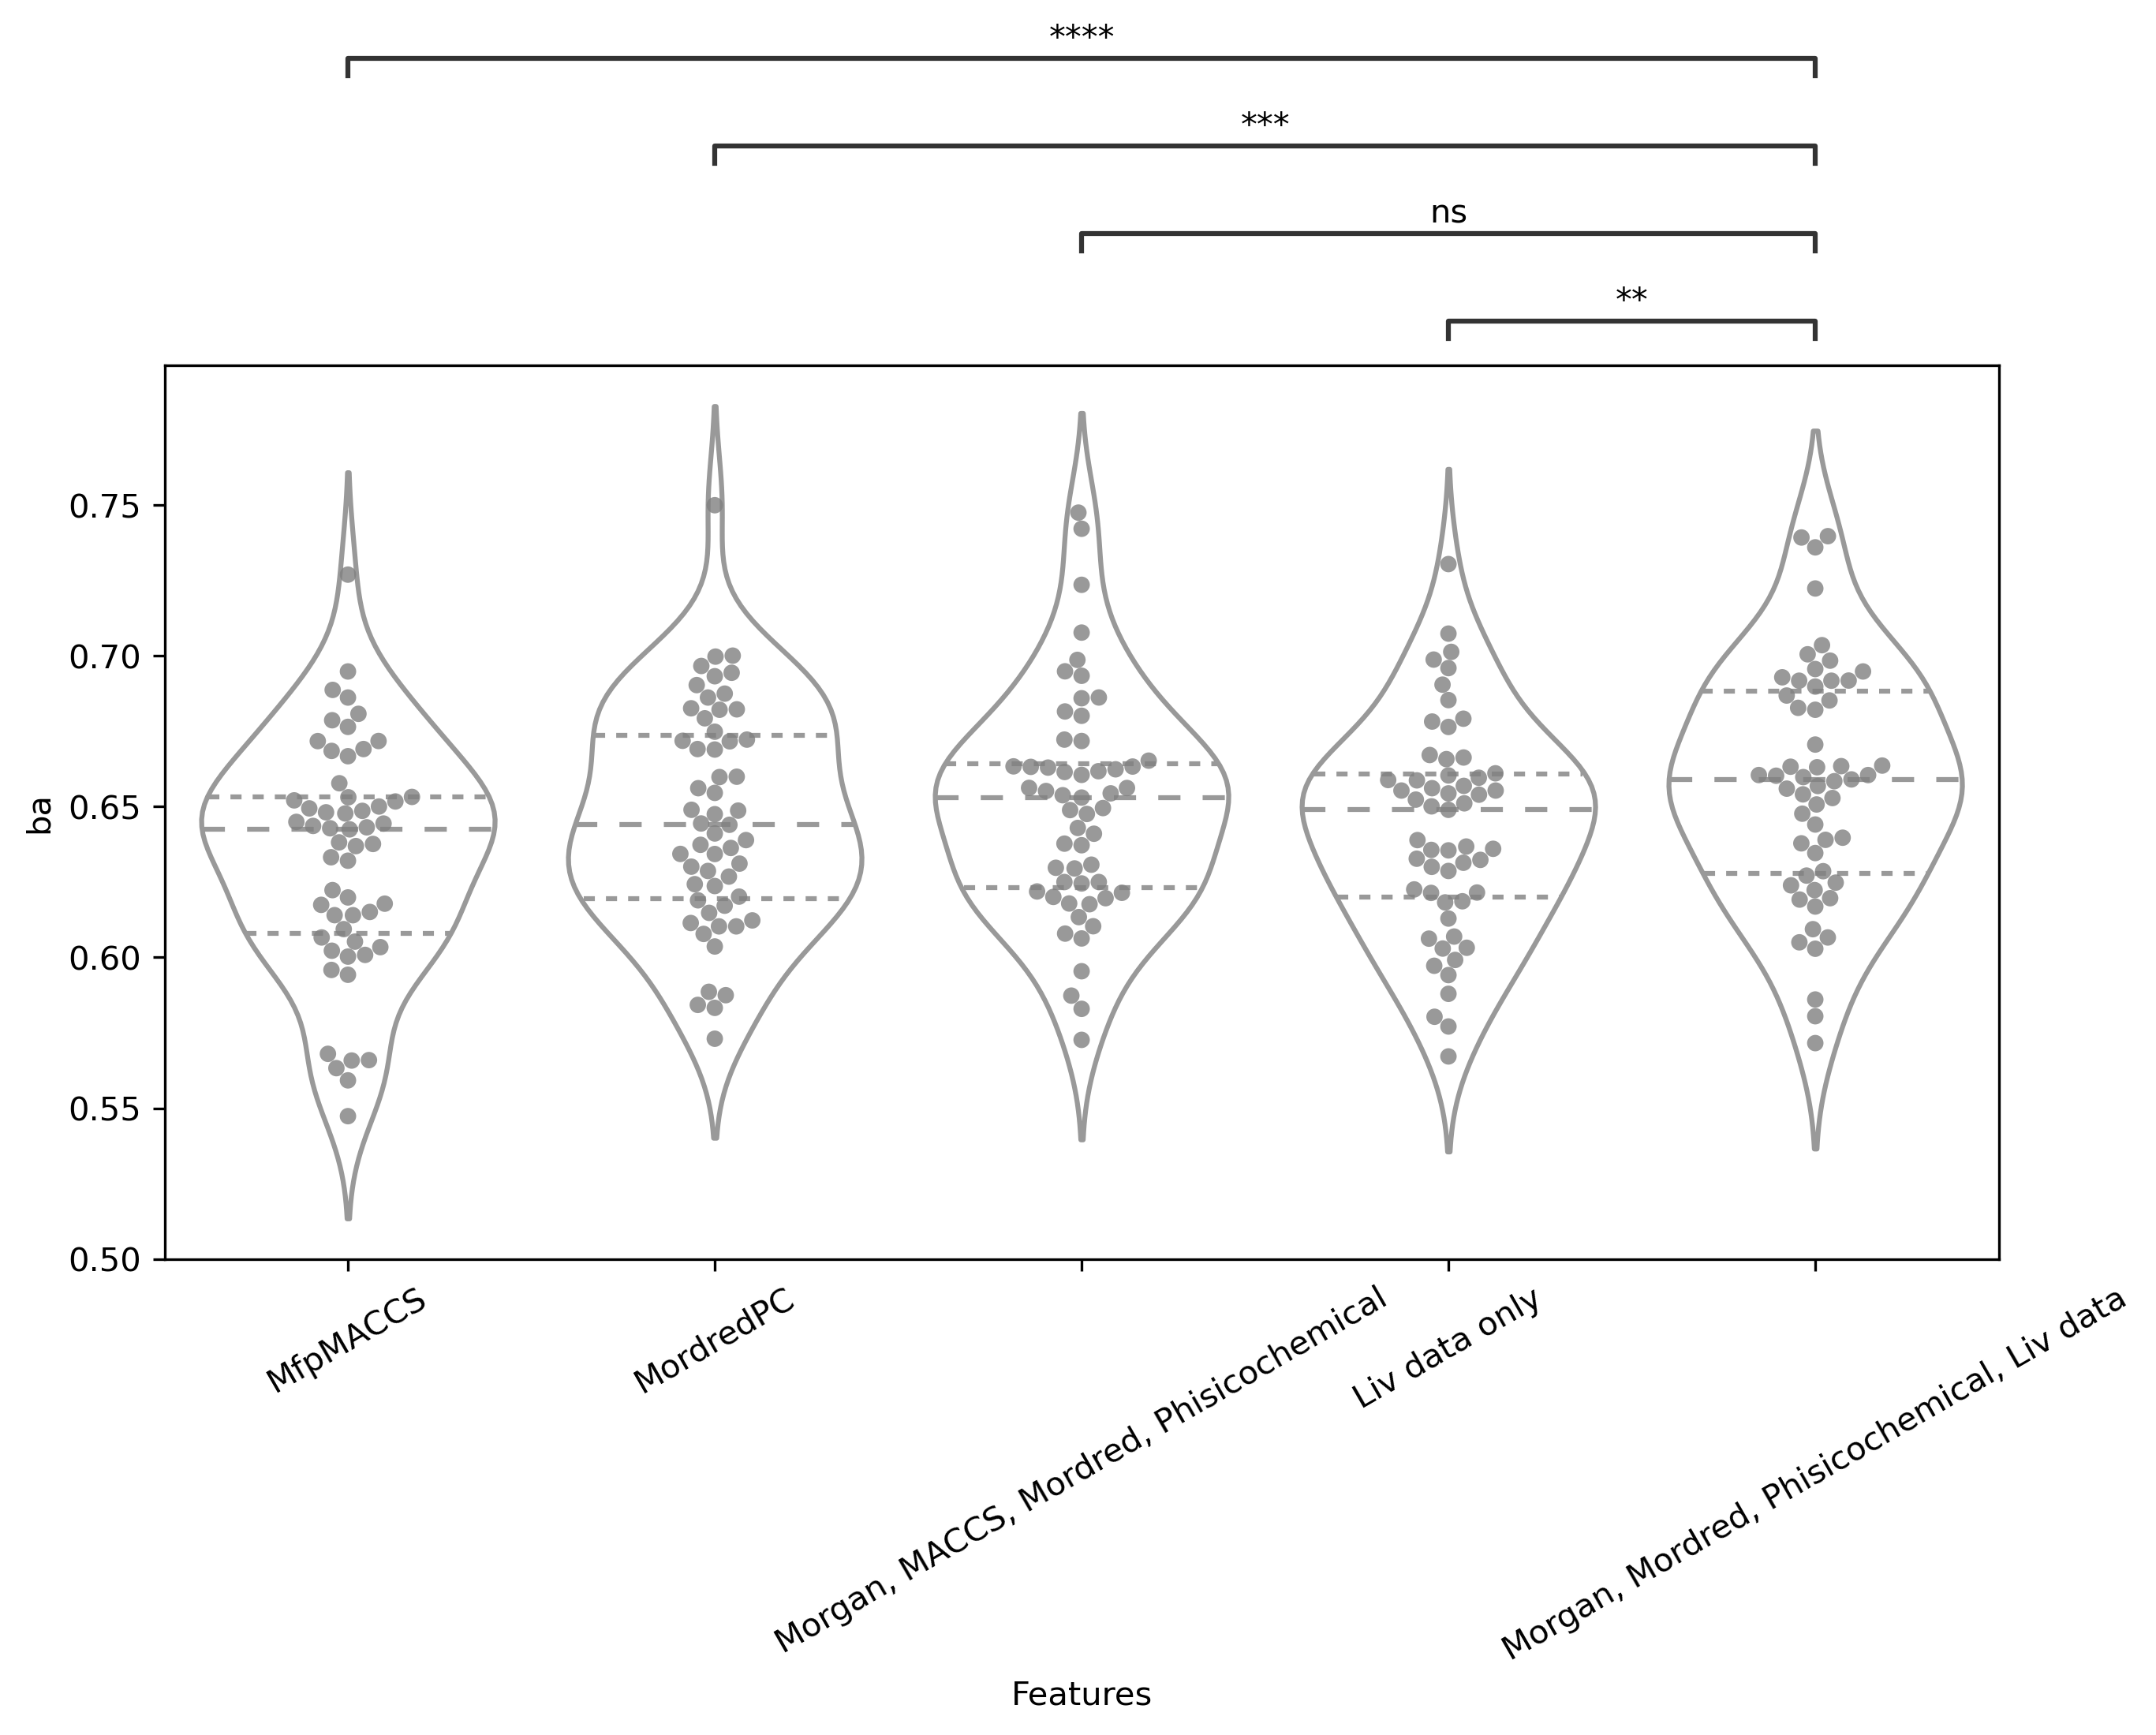

auc
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.705e-04 t=-4.040e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.193e-06 t=-5.469e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.557e-08 t=-6.644e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:2.192e-07 t=-5.932e+00


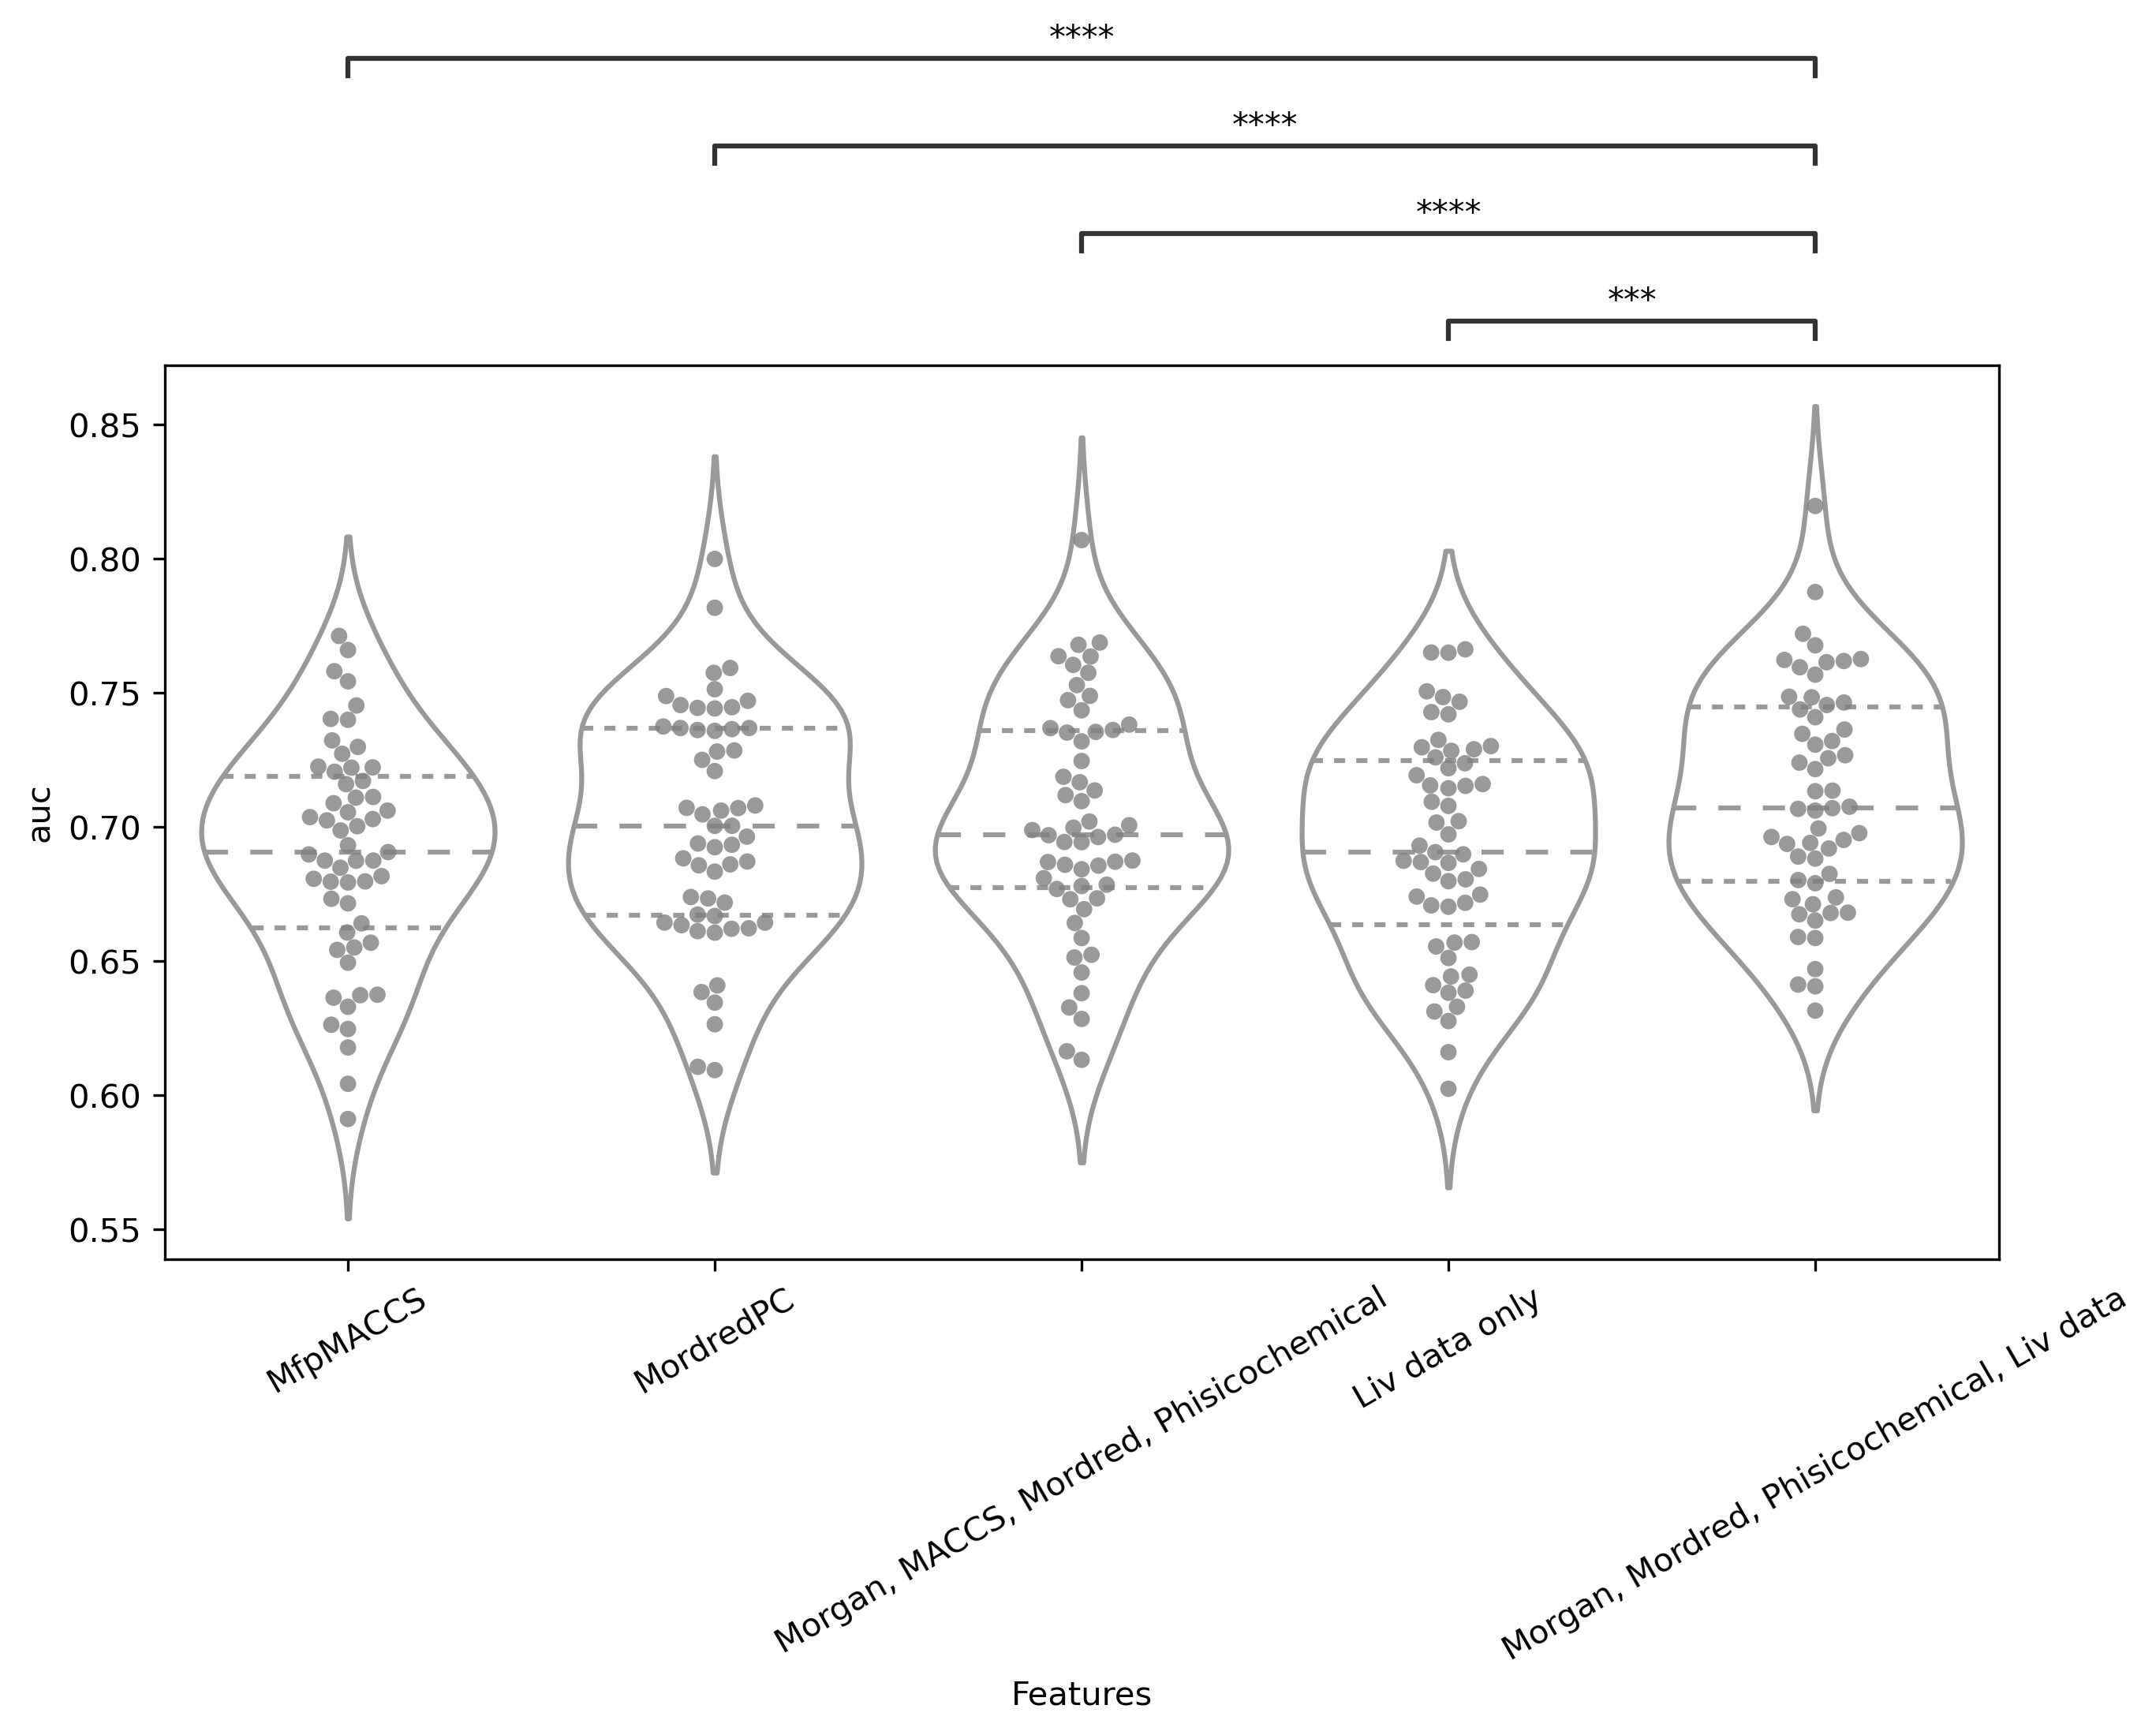

mcc
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:9.198e-03 t=-2.702e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:3.211e-02 t=-2.200e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:2.929e-04 t=-3.873e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:5.748e-05 t=-4.367e+00


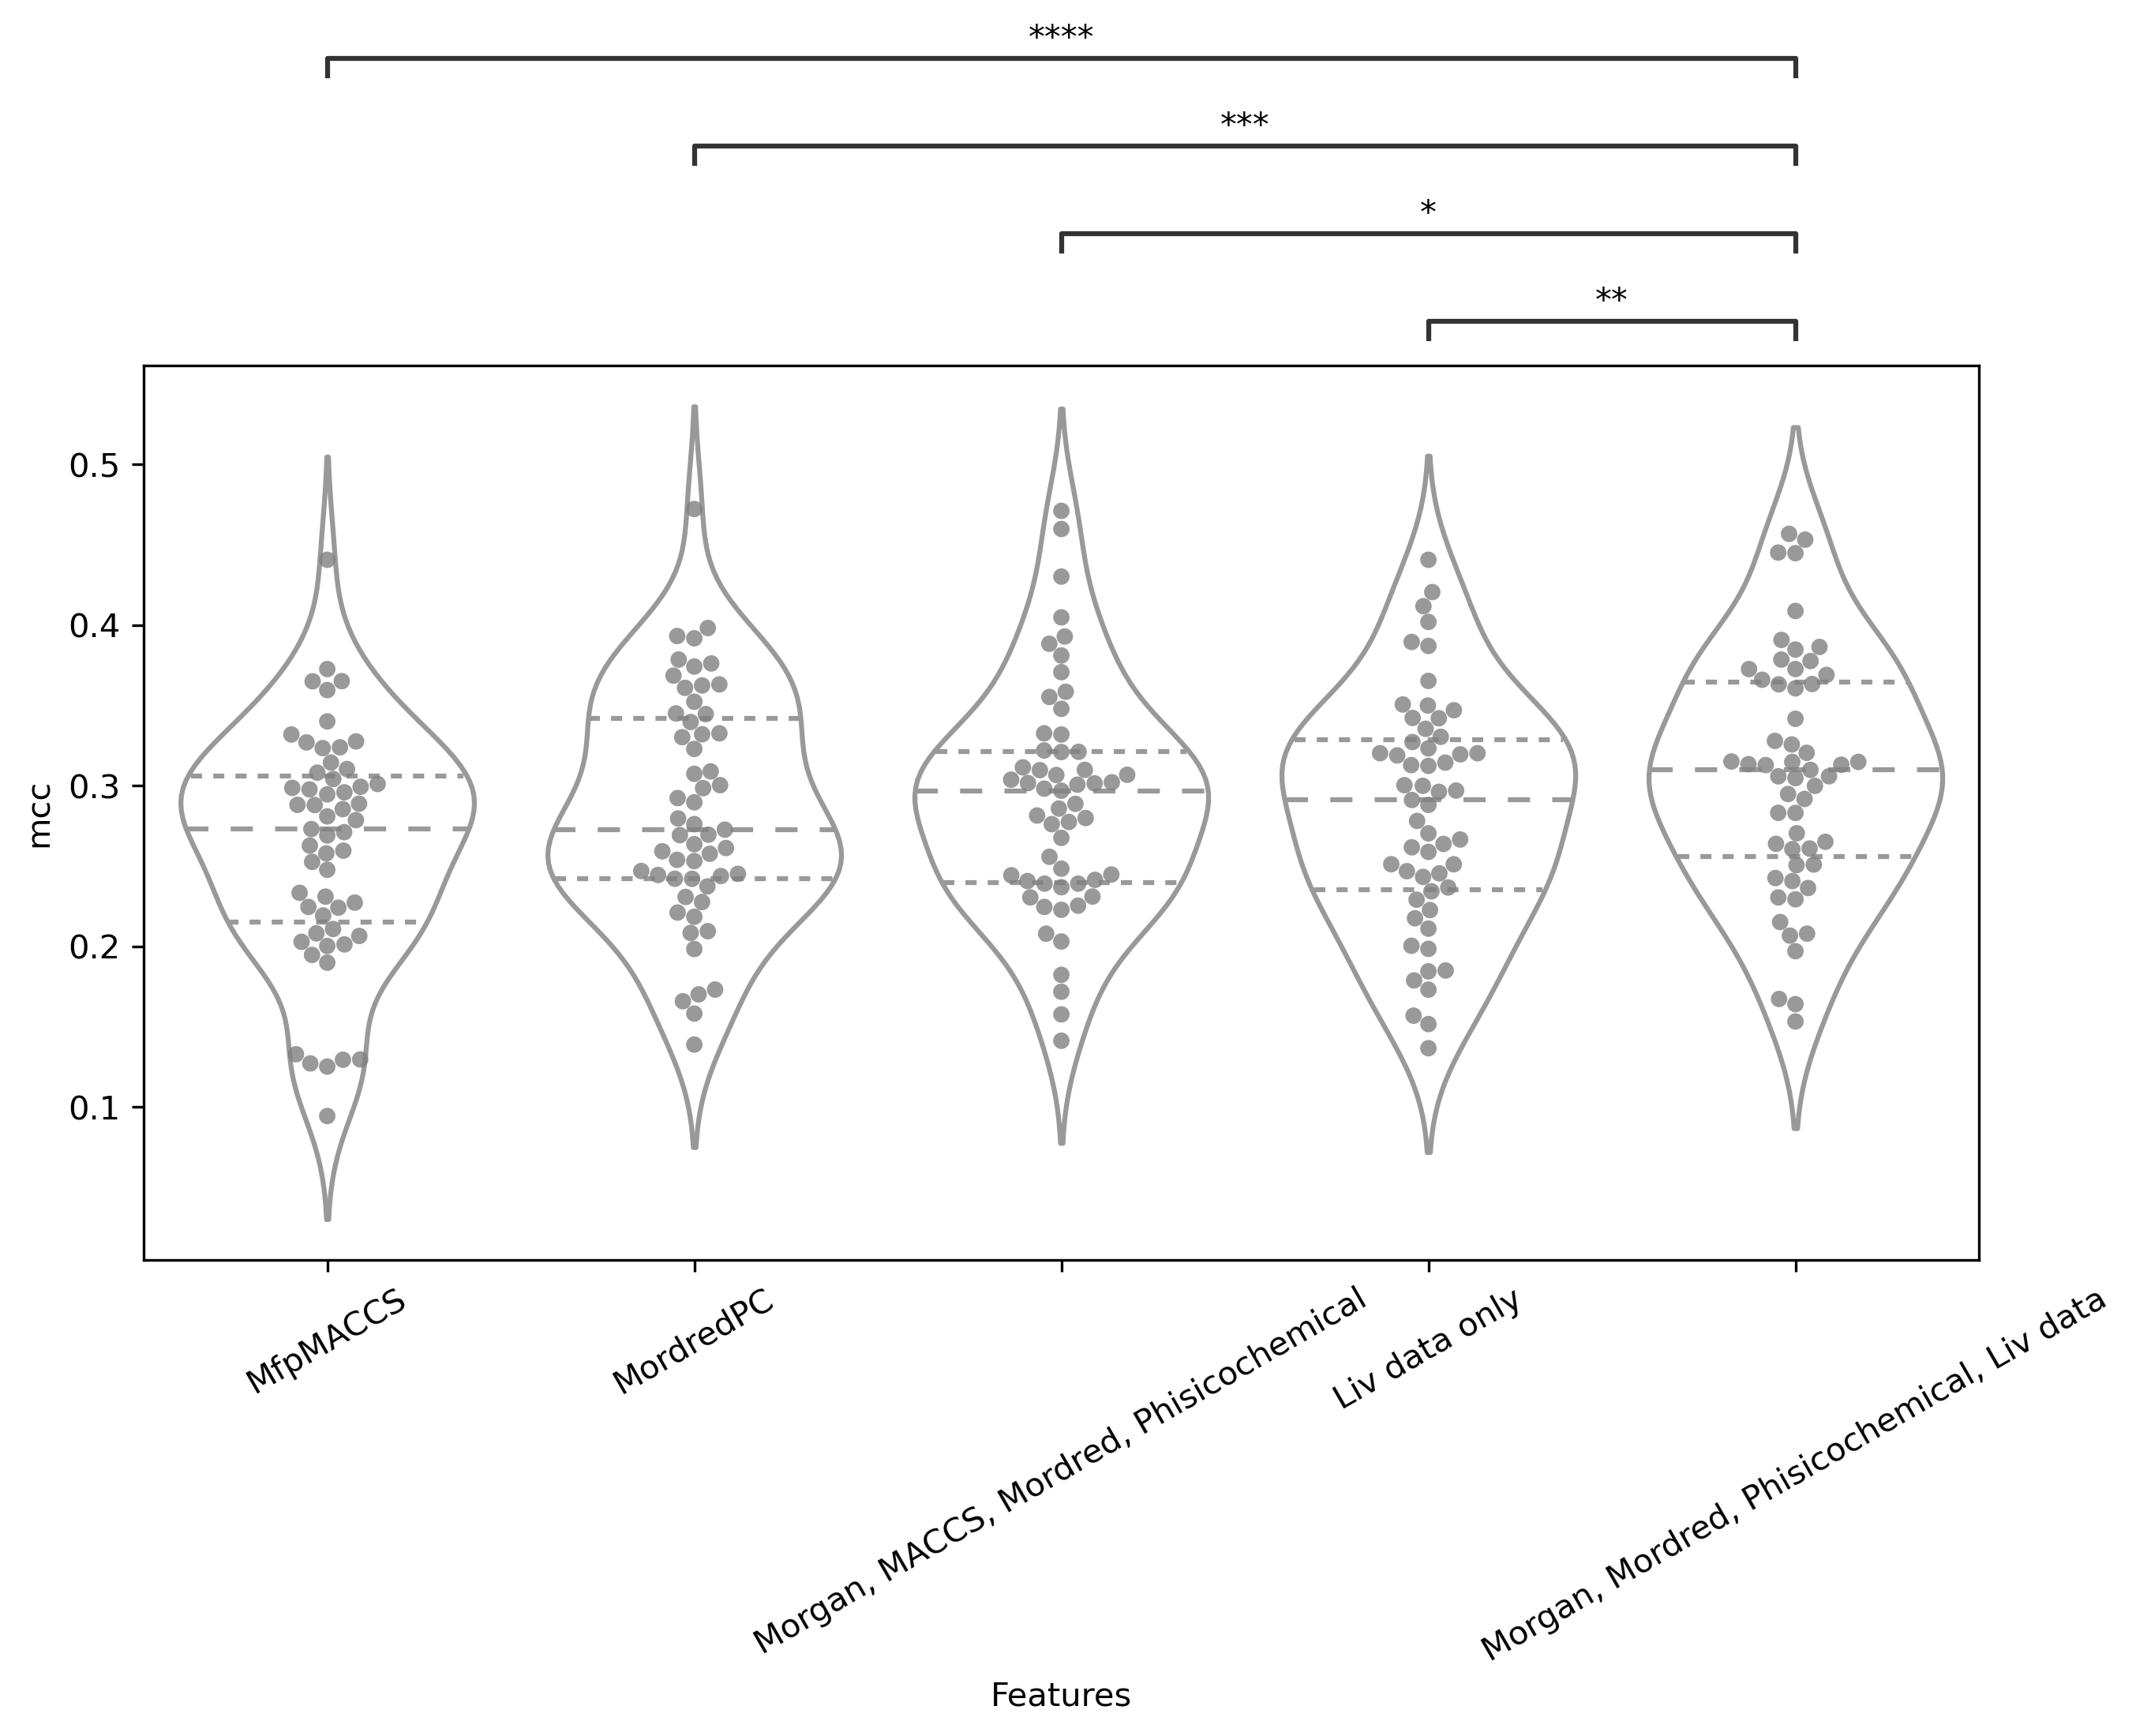

Sensitivity
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:4.136e-03 t=-2.995e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:8.532e-01 t=1.860e-01
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:5.716e-01 t=-5.691e-01
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:6.594e-02 t=-1.877e+00


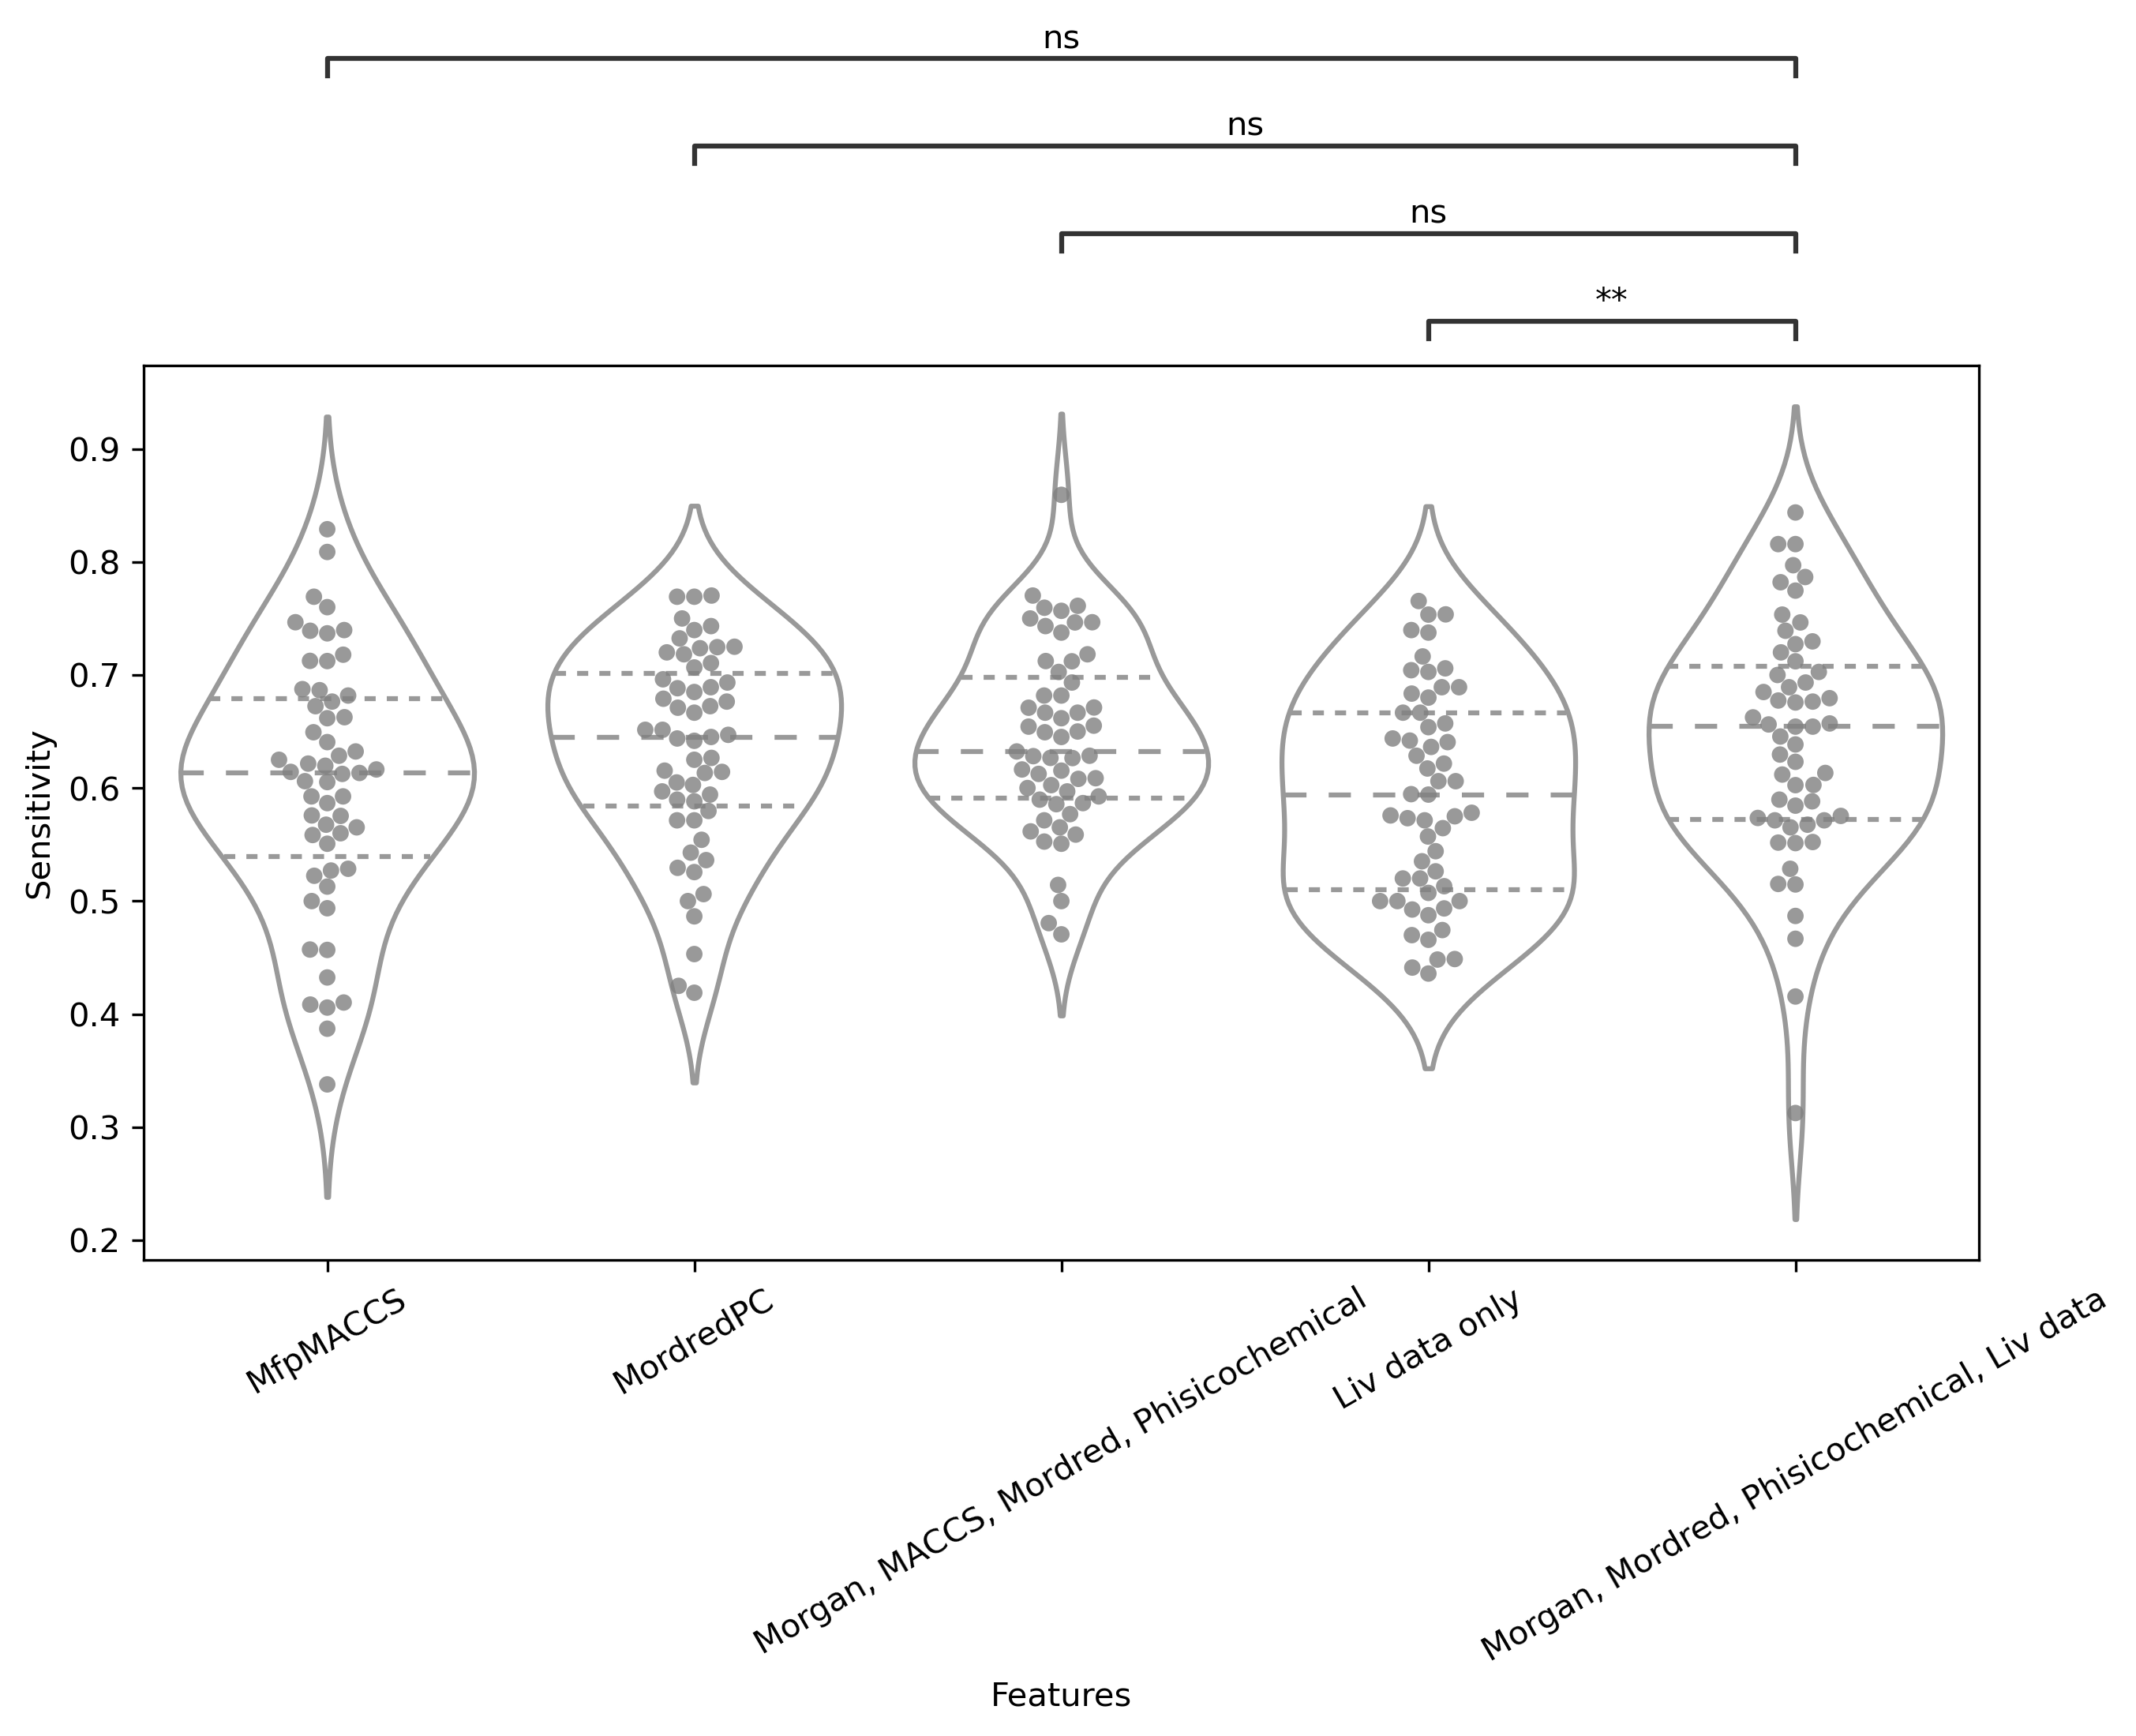

Specificity
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.585e-01 t=1.430e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:5.758e-02 t=-1.940e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.308e-01 t=-1.534e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:4.837e-01 t=-7.052e-01


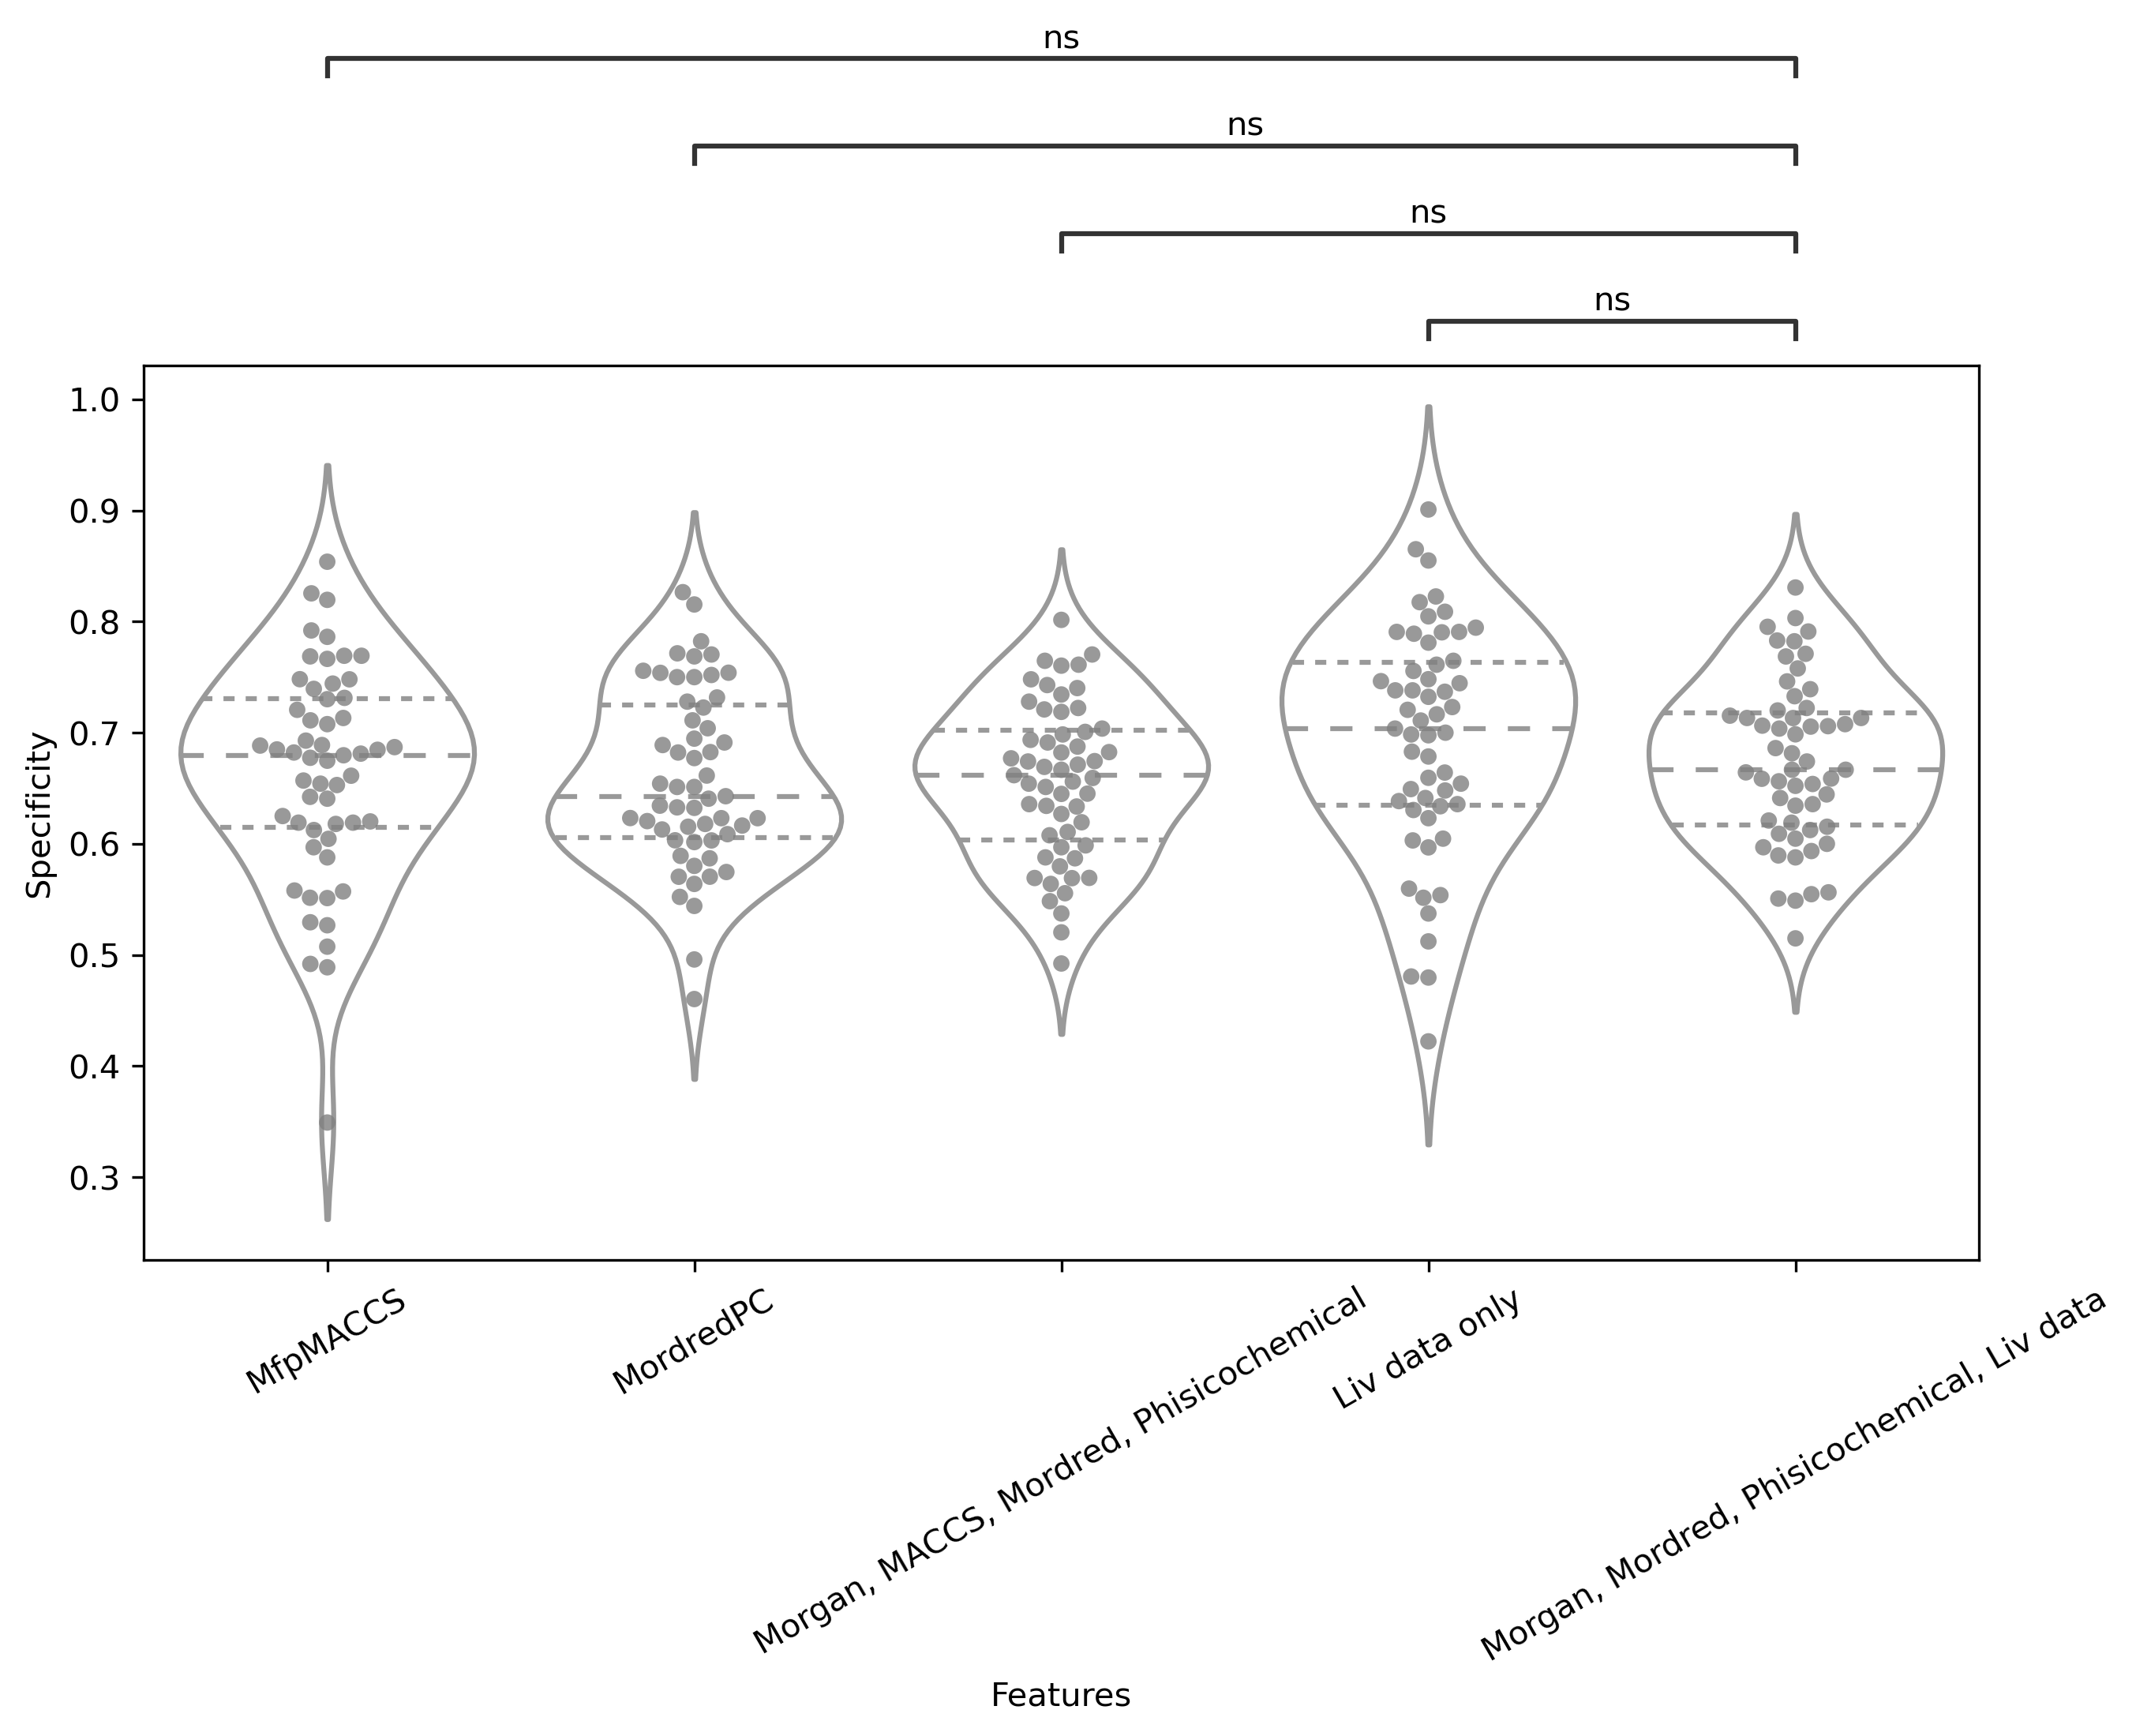

f1
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:9.686e-01 t=3.959e-02
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.866e-02 t=-2.426e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.802e-02 t=-2.440e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:3.520e-02 t=-2.160e+00


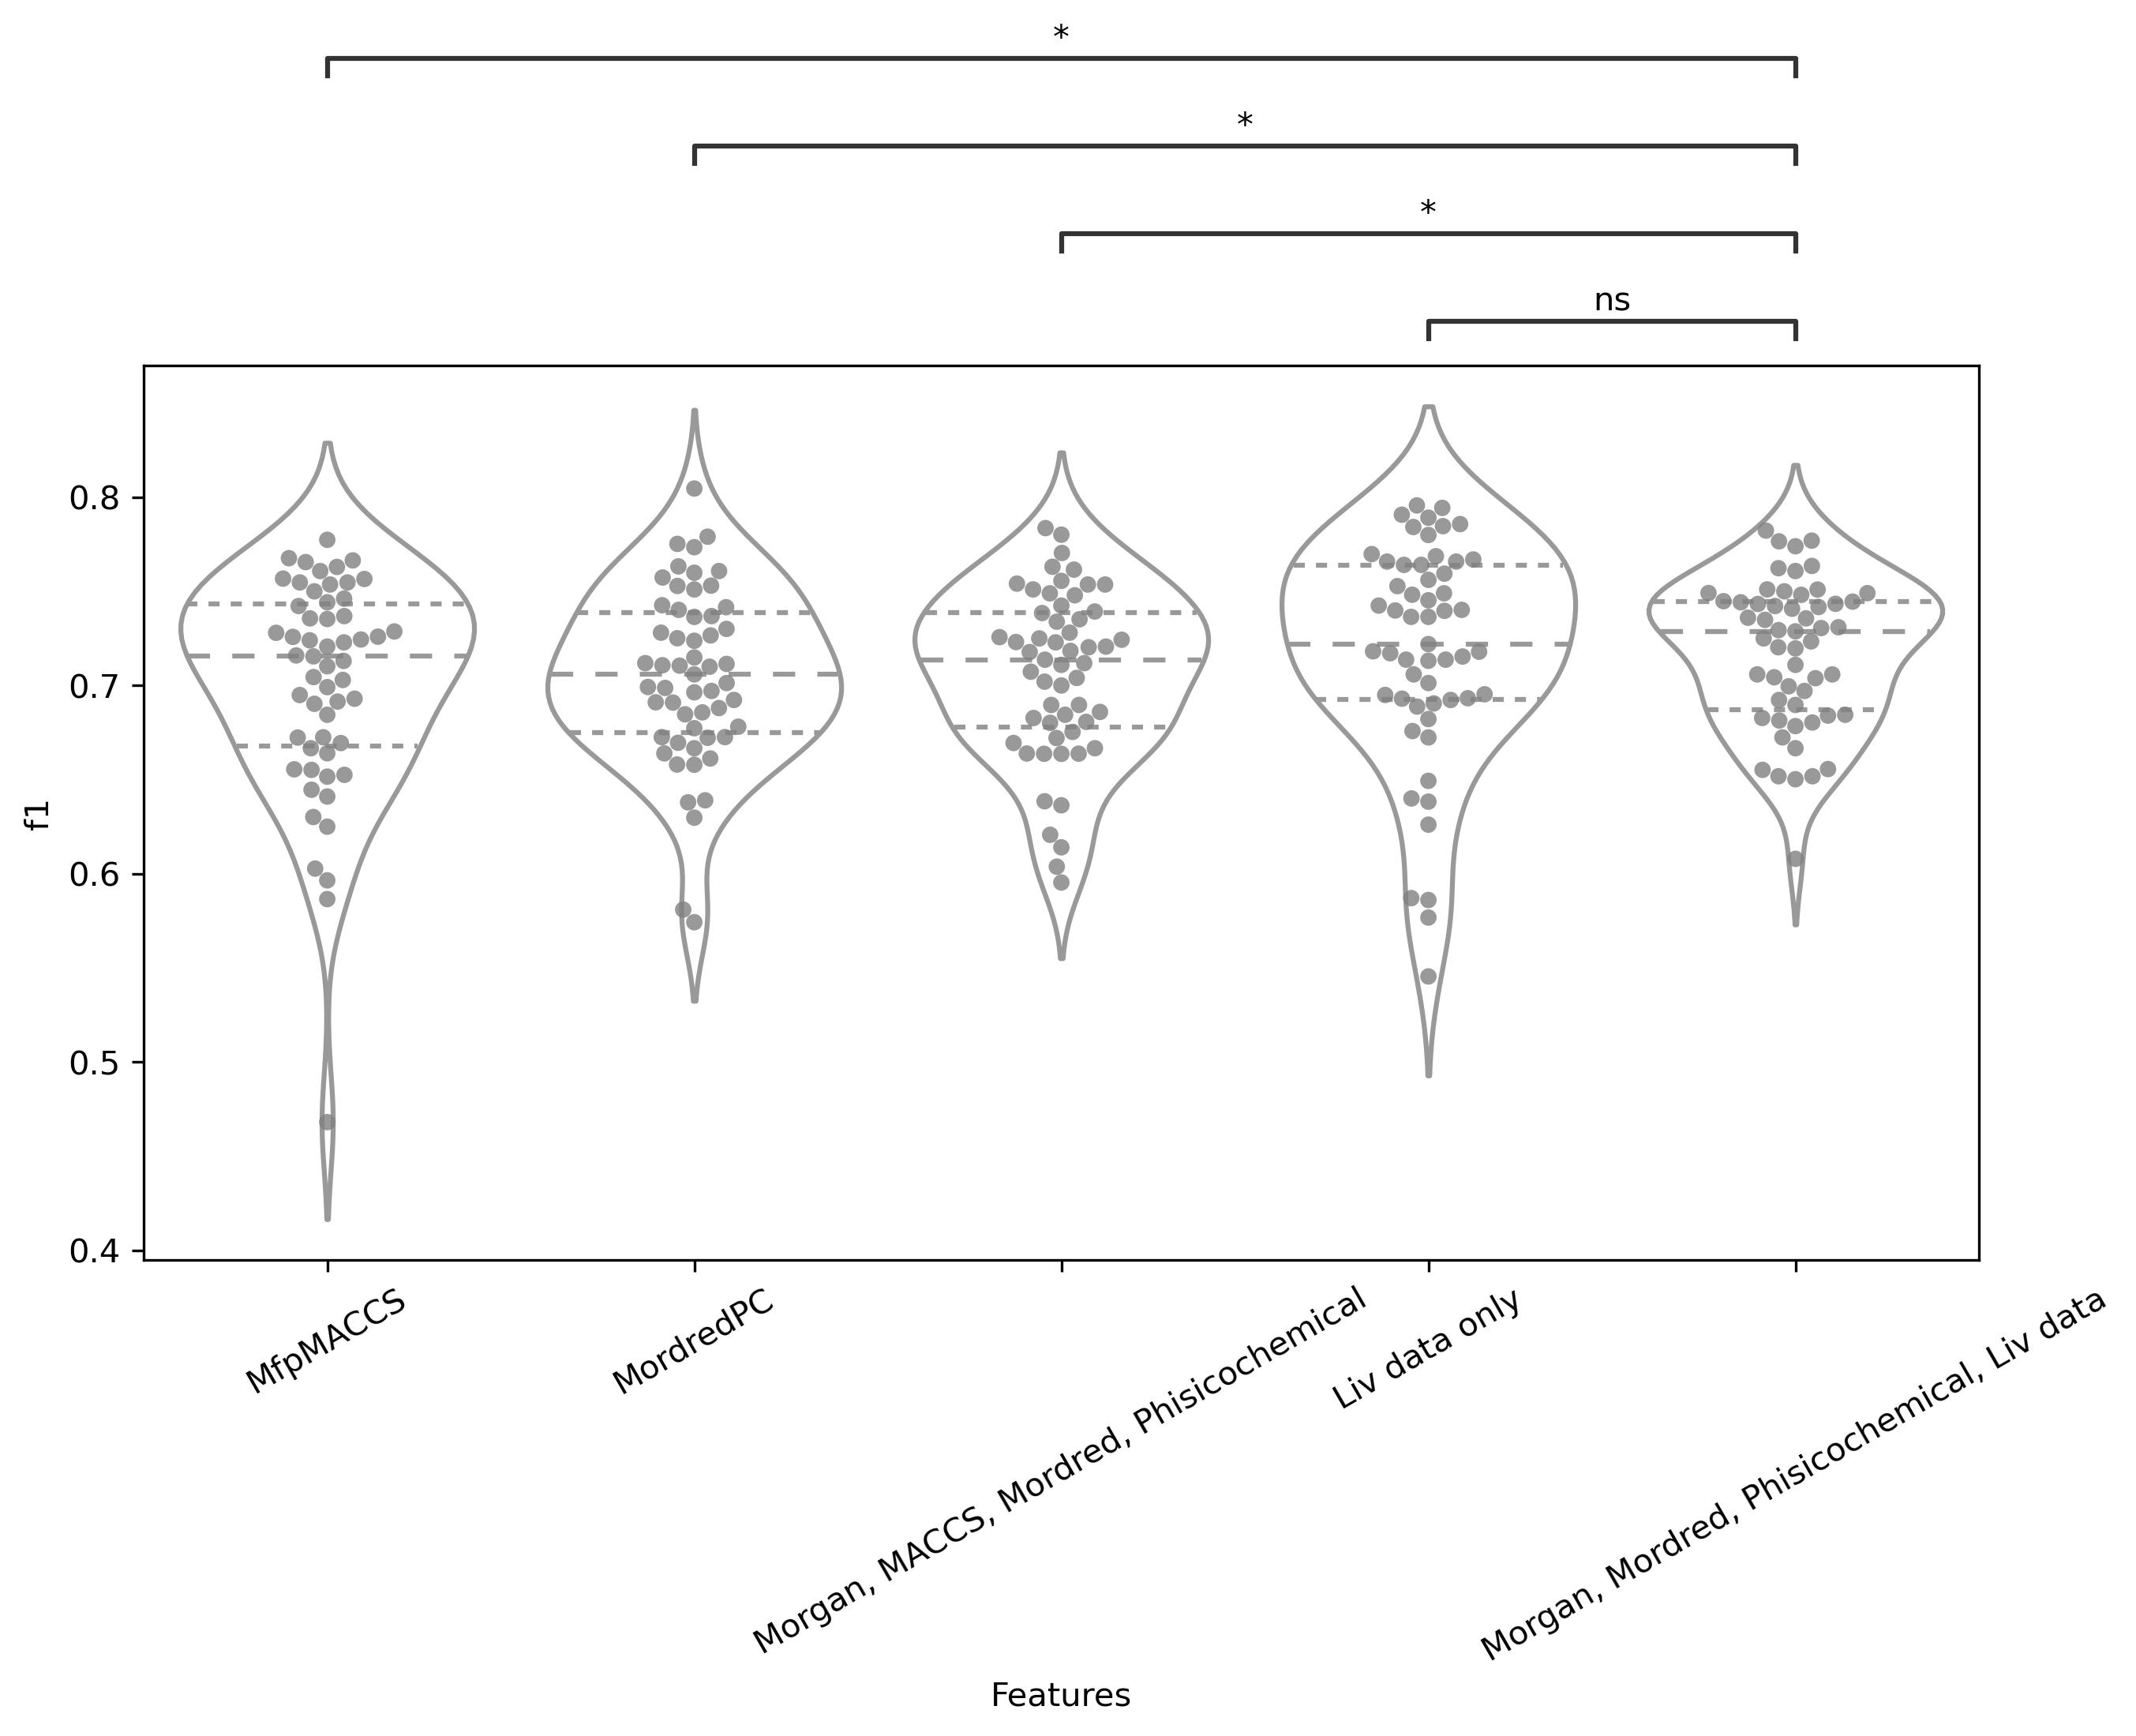

pos_LR
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:2.391e-01 t=1.190e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.516e-02 t=-2.509e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.188e-02 t=-2.604e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:2.453e-03 t=-3.178e+00


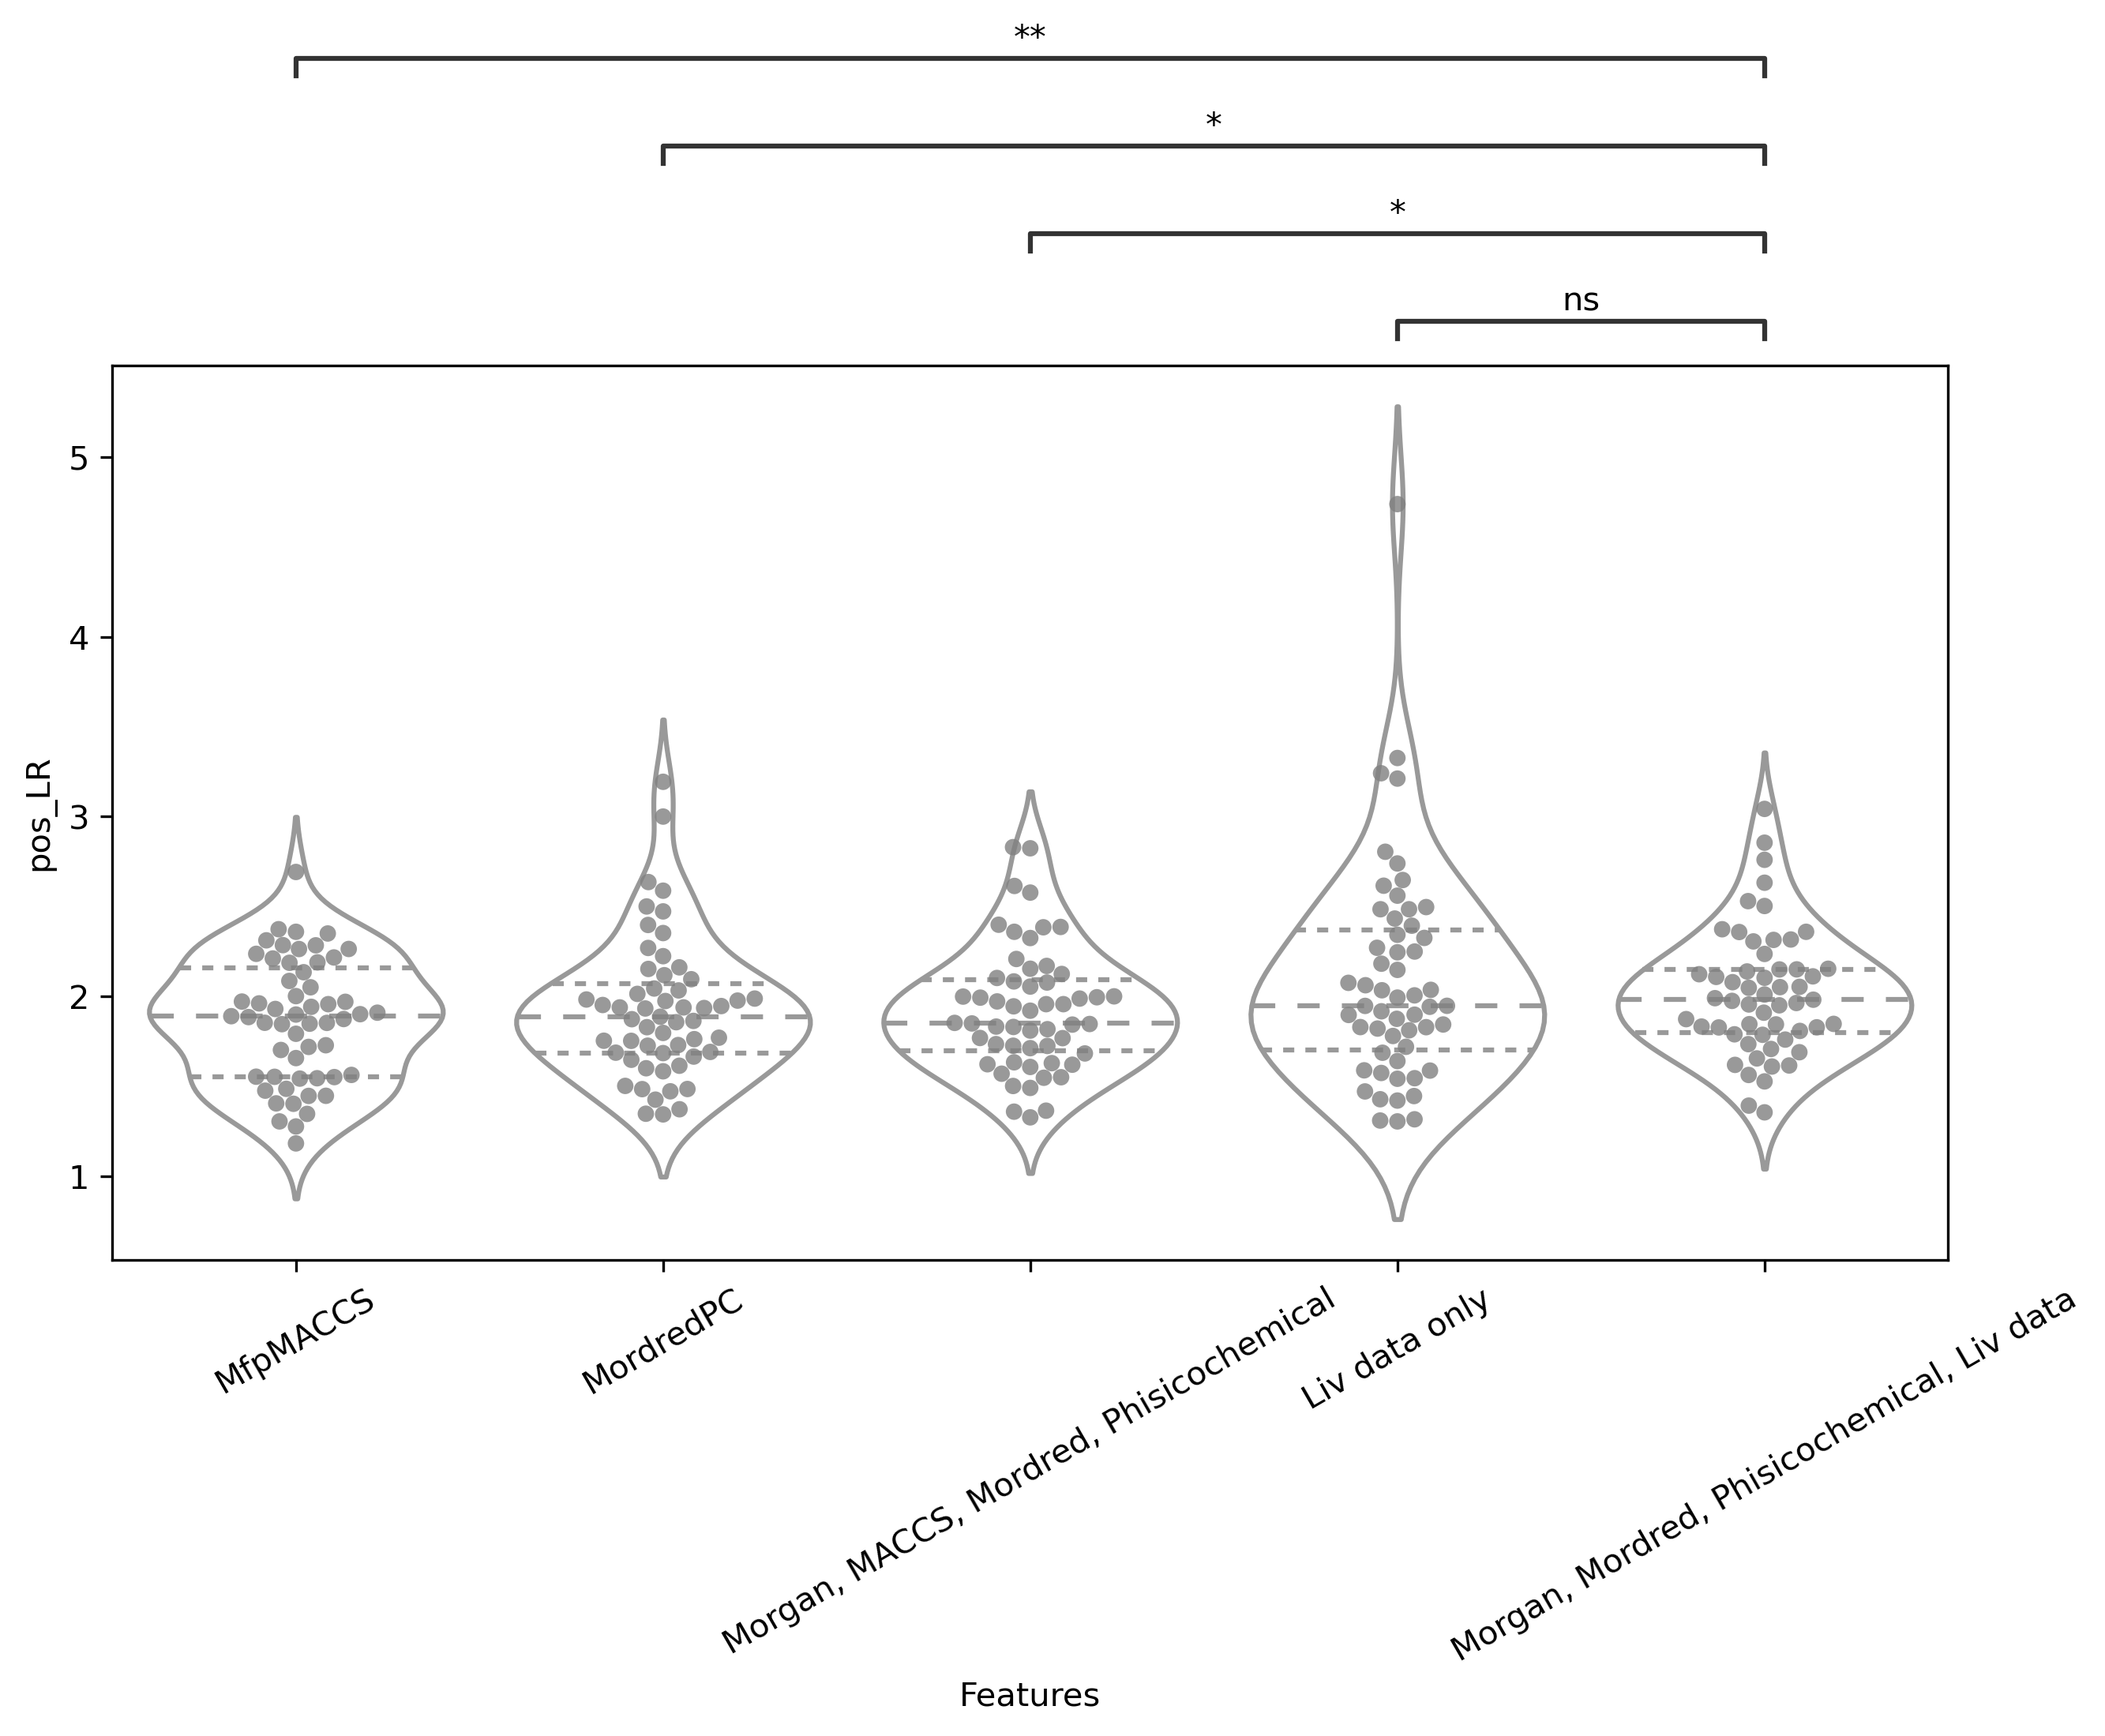

ppv
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:7.395e-04 t=-3.578e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:2.073e-01 t=-1.276e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.772e-02 t=-2.446e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.165e-03 t=-3.430e+00


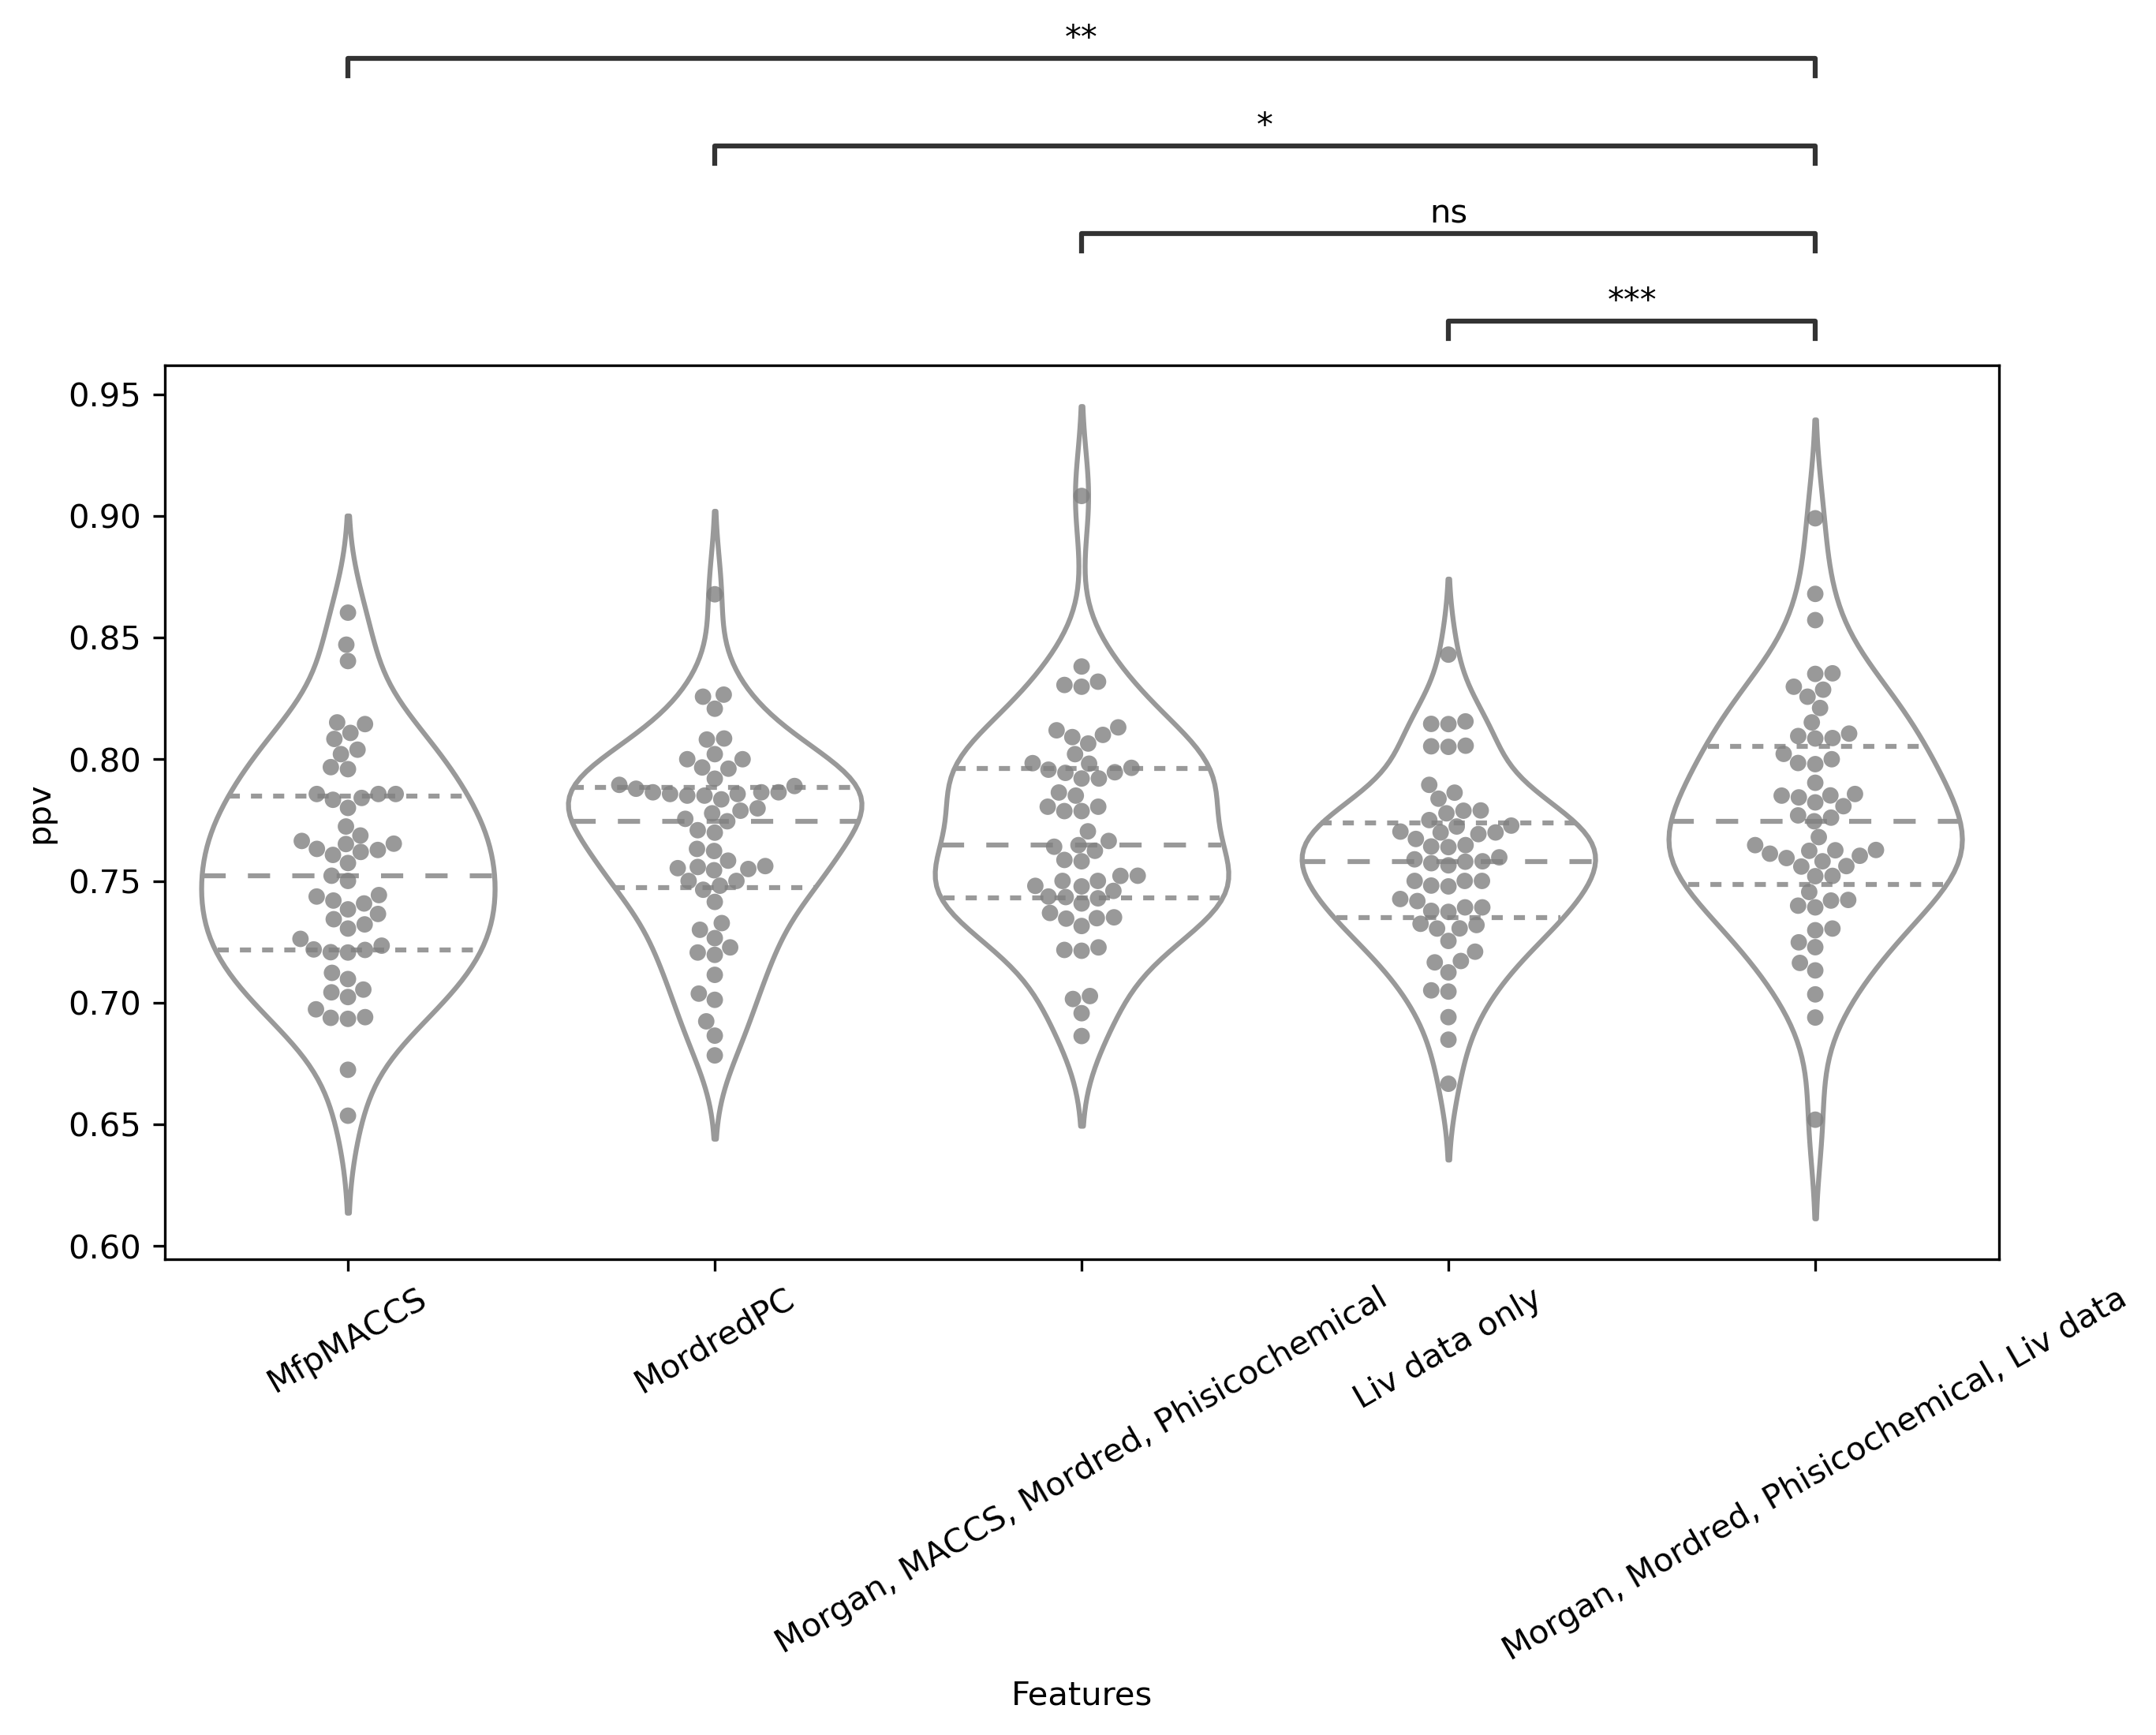

average_precision_score
DILI
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Liv data only vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:5.409e-05 t=-4.385e+00
Morgan, MACCS, Mordred, Phisicochemical vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:1.180e-04 t=-4.152e+00
MordredPC vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:2.589e-06 t=-5.254e+00
MfpMACCS vs. Morgan, Mordred, Phisicochemical, Liv data: t-test paired samples, P_val:3.910e-08 t=-6.397e+00


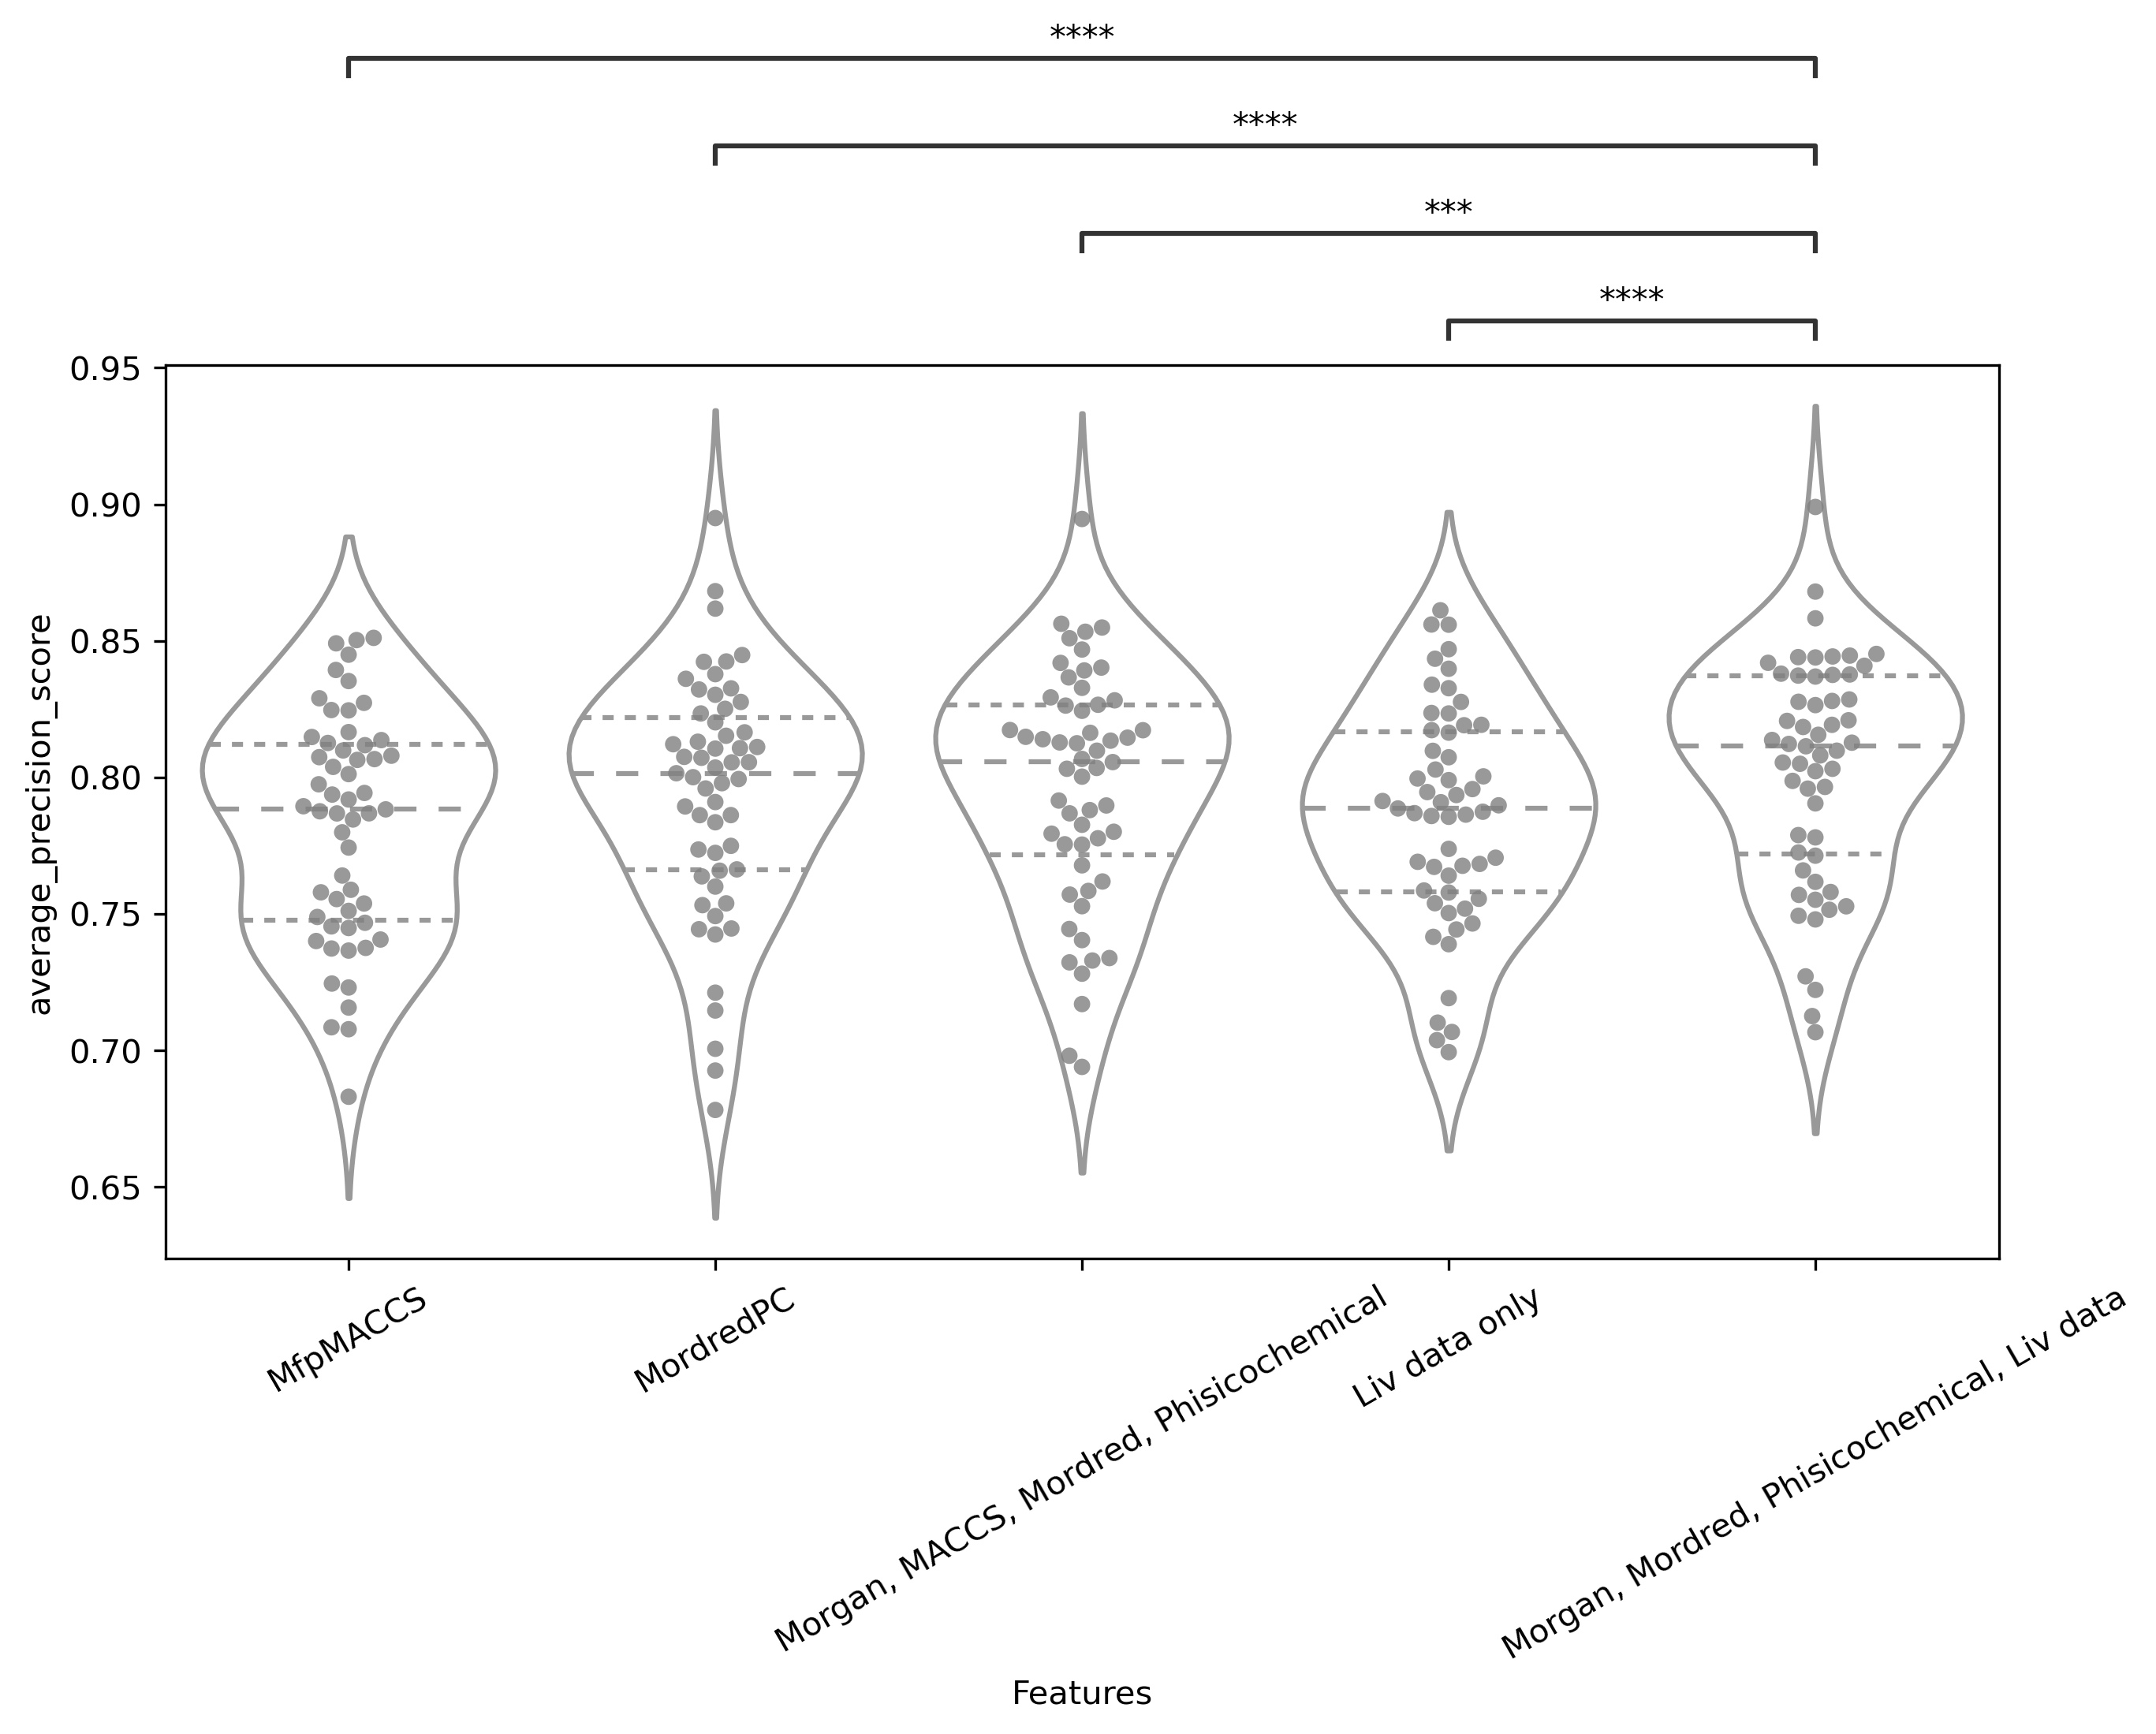

In [15]:
for metric in ["ba", "auc", "mcc", "Sensitivity", "Specificity", "f1", "pos_LR", "ppv", "average_precision_score"]:

    print(metric)
    endpoint="DILI"
    print(endpoint)
    
    pairs= [('Morgan, Mordred, Phisicochemical, Liv data', "MordredPC"),
            ('Morgan, Mordred, Phisicochemical, Liv data', "Morgan, MACCS, Mordred, Phisicochemical"),
            ('Morgan, Mordred, Phisicochemical, Liv data', 'MfpMACCS'),
            ('Morgan, Mordred, Phisicochemical, Liv data', 'Liv data only')]

    my_order= ["MfpMACCS",
                "MordredPC",
               "Morgan, MACCS, Mordred, Phisicochemical",
                "Liv data only",
                "Morgan, Mordred, Phisicochemical, Liv data"]


    fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

    g = sns.violinplot(ax=ax,x='Features', y=metric, data=df, scale='width', inner='quartile', order=my_order, color="white")
    g = sns.swarmplot(ax=ax,x='Features', y=metric, data=df, order=my_order,color="grey", alpha=0.8)
    g.set_xticklabels(g.get_xticklabels(), rotation=30)        
        
    annotator = Annotator(ax=ax, pairs = pairs, data=df, x="Features", y=metric, order=my_order)
    annotator.configure(test='t-test_paired', text_format='star', loc='outside')
    annotator.apply_and_annotate()

    plt.show()
